# Project proposal

## Seasonal Effects on Female Red-Billed Gull Weight in New Zealand.

### Introduction:
The red-billed gull is the most common gull on the New Zealand coast. It is frequently seen in coastal towns, garbage dumps, and at fish processing facilities. Our research question is about finding the differences in means of the weights of the female red-billed gull based on the two season climates. We think that the primary and underlying cause of the weight variations within a year for the red-billed gulls lies in the seasonal effects that bring about change in various aspects of their habits.

Some seasonal effects include:
- An extremely long egg-laying period that can extend from mid-September to January.

- The main food at the largest colonies is the euphausiid Nyctiphanes australis (krill) which occurs more abundantly within the spring season and early summer.

- At Kaikoura during the breeding season adult gulls can sustain themselves on alternative foods such as earthworms, small fish, garbage and kelp flies, but they are dependent upon an abundant and regular supply of the surface-swarming krill for successful breeding. Outside of the breeding season the diet is highly variable. Some still feed at sea; others feed on small invertebrates along the shore, or from human sources such as handouts in towns or cities, offal being discarded from fishing boats and garbage at rubbish dumps.
<br>

Before conducting a hypothesis test, we will calculate preliminary results to understand the distribution of the population and the difference in means in different seasons. In this section, we will use  the dataset to compute estimates of the means of weight of female gulls in summer and winter and find their differences. Normality assumption is important for deciding the measures of central tendency and other statistical methods for data analysis, so we will visualize the distributions as well.

### Preliminary results:

In [16]:
# Loading all the required libraries
library(tidyverse)
# library(cowplot)
# library(datateachr)
# library(digest)
# library(infer)
# library(repr)
# library(taxyvr)


In [17]:
# Reading dataframe from the internet and storing it to a variable
gulls <- read_csv("https://raw.githubusercontent.com/maggie63/stat-201-group-4/main/gulls_data.csv") |>
    mutate(LOCATION = as_factor(LOCATION), COAST = as_factor(COAST), SEASON = as_factor(SEASON), SEX = as_factor(SEX)) |>
    filter((!is.na(WEIGHT)))
# Printing the first few rows of the dataframe
head(gulls)

Rows: 2487 Columns: 6
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): LOCATION, COAST, SEASON, SEX
dbl (2): WEIGHT, LENGTH

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


WEIGHT,LENGTH,LOCATION,COAST,SEASON,SEX
<dbl>,<dbl>,<fct>,<fct>,<fct>,<fct>
262,38.9,MARAETAI,EAST,WINTER,MALE
300,41.3,MURIWAI,WEST,SUMMER,MALE
250,36.6,MURIWAI,WEST,WINTER,MALE
242,36.0,MARAETAI,EAST,WINTER,FEMALE
261,37.1,MURIWAI,WEST,WINTER,MALE
262,38.2,MURIWAI,WEST,WINTER,MALE


We will check whether the seasons are represented similarly/equally and the number of samples is more than 30 per season.

In [18]:
# Group data to see if the categorical variables are representated properly
n_obs<- gulls |>
    select(-LENGTH) |>
    filter(SEX == "FEMALE" ) |>
    group_by(SEASON) |>
    summarise(n = n())
n_obs

SEASON,n
<fct>,<int>
WINTER,615
SUMMER,665


Since the population is representated properly in the sample, we can move on with rest of the preliminary analysis.

##### Summary of sample mean and standard error for each season:

In [19]:
# Filtering and calculating the sample mean and standard error
gull_seasons <- gulls |>
    filter(SEX == "FEMALE" ) |>
    select(WEIGHT, SEASON) |>
    group_by(SEASON)

# Calculating the sample mean and standard error
gull_summary <- gull_seasons |>
    summarise(n = n(),
              sample_mean = mean(WEIGHT),
              sample_std_error = sd(WEIGHT) / sqrt(n))
gull_summary

SEASON,n,sample_mean,sample_std_error
<fct>,<int>,<dbl>,<dbl>
WINTER,615,253.5252,0.4220535
SUMMER,665,270.7729,0.4043504


##### Sample distribution of female gulls in summer vs. winter:

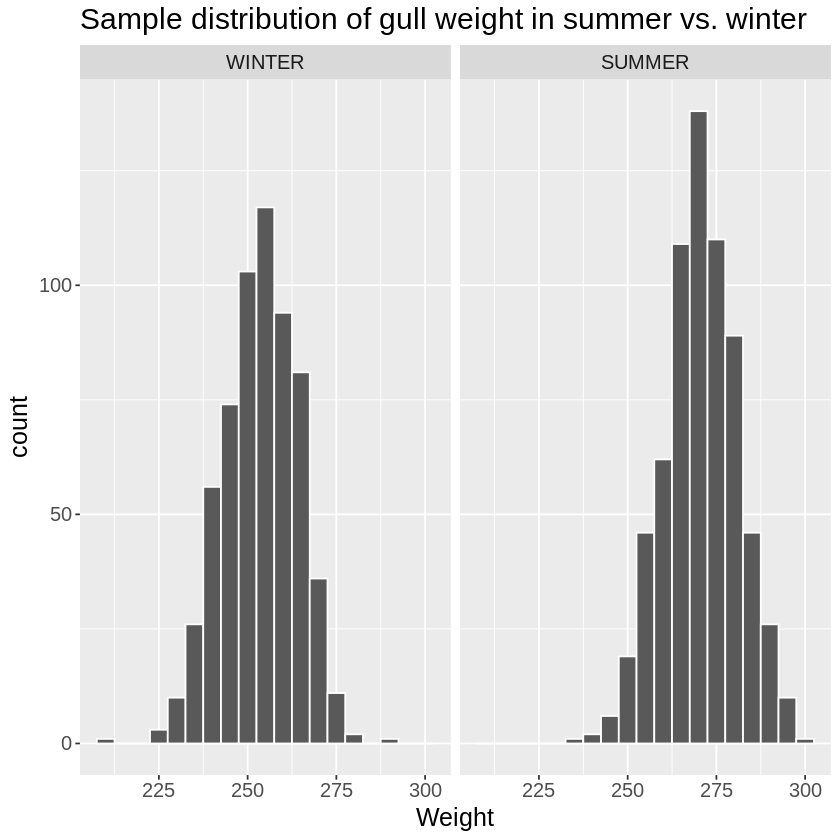

In [20]:
# Plotting sample distribution in summer vs. winter
gull_pop_dist <- gull_seasons |>
    ggplot() +
    geom_histogram(aes(x = WEIGHT), binwidth = 5, color = 'white') +
    facet_wrap(~ SEASON) +
    labs(x = "Weight", title = "Sample distribution of gull weight in summer vs. winter") +
    theme(text = element_text(size = 15))
gull_pop_dist


##### Box plot to compare weight of gull in summer vs. winter:

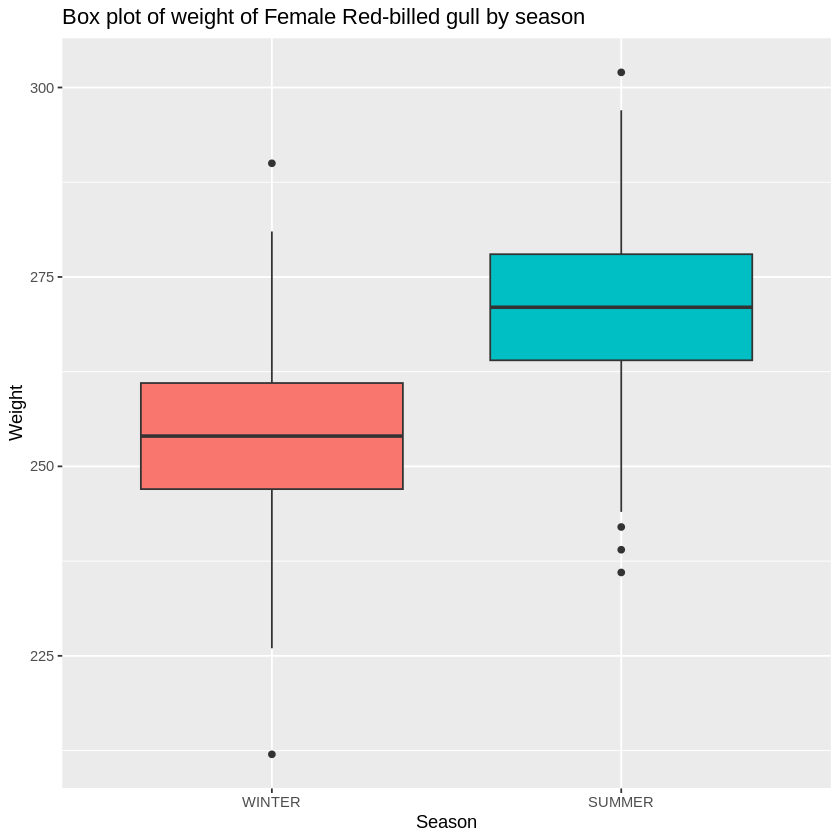

In [21]:
winter_summer__boxplots <-
    gull_seasons %>%
    ggplot() +
    geom_boxplot(aes(x = SEASON, y = WEIGHT, fill = SEASON)) +
    ggtitle("Box plot of weight of Female Red-billed gull by season") +
    xlab("Season") +
    ylab("Weight") +
    guides(fill = "none")
winter_summer__boxplots

From the plots,
- the distributions are unimodal, symmetric, and bell-shaped meaning it is a normal distribution.
- the center of the winter distribution lie near 250 while the center of summer distribution lie near 275.
- the distributions have similar spread.

<br>

### Methods: Plan

The data used in the analysis is clearly stated, indicating transparency in data sources and collection methods. Moreover, the sample distribution is normal meaning the population distribution is also normal. This adds to the credibility of the report, as it suggests that normality assumptions are met. Normality assumption is important for deciding the measures of central tendency and other statistical methods for data analysis. As mentioned at the beginning of the proposal, we expect to find the observed difference between the means of female gulls per season is statistically significant.

Although we have calculated sample means and standard errors for the winter and summer seasons in the preliminary results, these estimates are insufficient to draw a conclusion. Considering the variation of weight for each season, is the observed difference statistically significant? Therefore, we will perform a two-sample t-test to compare the means of the two independent samples of weight (winter and summer) to determine any significant difference between the means of the two weight groups. We carry out a t-test instead of a z-test since the population standard deviation is unknown. The t-test is more reliable in situations where the population parameters are unknown.
For this project, the scenarios to be considered:

- Null hypothesis ($H_0$): <br>
   > $H_0: \mu_1 - \mu_2 = 0$.

- Alternative hypothesis ($H_1$): <br>
   > $H_1: \mu_1 - \mu_2 \neq 0$.
    


In addition to the hypothesis test, we calculate a 95% confidence interval for the difference in sample means ($\mu_1 - \mu_2$). This will help understand how good the estimate is and is the best guess of an interval that contains the population parameter.

The results of this analysis could lead to several future questions and investigations, such as:
- What are the driving factors behind the observed differences between the weight in winter and summer in gulls?
- How do other variables (e.g., demographic factors, location, etc.) influence seasonal weight change in gulls?
- Are there any trends or long-term patterns influencing the weight of gulls in different seasons that need to be considered?
- How can global phenomena, such as climate change, impact the change in the weight of gulls in different seasons?

<br>

### References:

- Dataset. NZGRAPHER. (n.d.). https://grapher.jake4maths.com/?folder=sneddon&amp;dataset=GULLS.csv

- Red-billed gull: Tarāpunga: New Zealand Birds Online. New Zealand Birds Online - The digital encyclopaedia of New Zealand birds. (n.d.). https://nzbirdsonline.org.nz/species/red-billed-gull

- GULLS.CSV information. Inference. (n.d.). https://sites.google.com/view/inference/data-sets#h.p_IlT79LKK_MeP